In [1]:
import numpy as np
import numba
print(numba.__version__)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.interpolate import interp1d

from multiprocessing import Pool
from functools import partial

import MicroTools as micro
import MicroTools.plot_tools as pt

import param_scan
from param_scan import fast_histogram
from param_scan import get_nue_rates
from tqdm.notebook import tqdm  # Note the change here
# from tqdm.auto import tqdm

from ipywidgets import IntProgress
from IPython.display import display

0.58.1


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


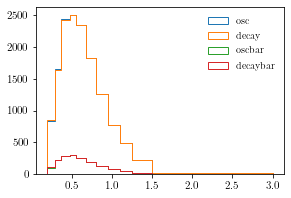

In [2]:
kwargs_osc = {
'oscillations': True, 
'decay': False, 
'decouple_decay': False, 
'disappearance': True, 
'energy_degradation': False, 
'use_numu_MC': True, 
'undo_numu_normalization': False,
'n_replications': 10,
'include_antineutrinos': False
}
kwargs_decay = {
'oscillations': True, 
'decay': True, 
'decouple_decay': False, 
'disappearance': True, 
'energy_degradation': False, 
'use_numu_MC': True, 
'undo_numu_normalization': False,
'n_replications': 10,
'include_antineutrinos': False
}
theta = {"g": 1e-1, "m4": 1, "Ue4Sq": 0.05, "Um4Sq": 0.05}
nue_app_osc = get_nue_rates(theta, **kwargs_osc)["MC_nue_app"]
nue_app_decay = get_nue_rates(theta, **kwargs_decay)["MC_nue_app"]
nuebar_app_osc = get_nue_rates(theta, **kwargs_osc)["MC_nuebar_app"]
nuebar_app_decay = get_nue_rates(theta, **kwargs_decay)["MC_nuebar_app"]

bin_widths = np.diff(param_scan.MB_Ereco_official_bins)
plt.hist(param_scan.MB_Ereco_official_bins[:-1], param_scan.MB_Ereco_official_bins, weights=nue_app_osc/bin_widths, histtype="step", label="osc")
plt.hist(param_scan.MB_Ereco_official_bins[:-1], param_scan.MB_Ereco_official_bins, weights=nue_app_decay/bin_widths, histtype="step", label="decay")
plt.hist(param_scan.MB_Ereco_official_bins[:-1], param_scan.MB_Ereco_official_bins, weights=nuebar_app_osc/bin_widths, histtype="step", label="oscbar")
plt.hist(param_scan.MB_Ereco_official_bins[:-1], param_scan.MB_Ereco_official_bins, weights=nuebar_app_decay/bin_widths, histtype="step", label="decaybar")
plt.legend()


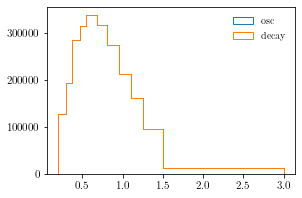

In [16]:
# check further
import MiniTools as mini
n_replications = 10
Ereco_nue_ext = param_scan.replicate(param_scan.Ereco_nue, n=n_replications)
Etrue_nue_ext = param_scan.replicate(param_scan.Etrue_nue, n=n_replications)
Weight_nue_ext = param_scan.replicate(param_scan.Weight_nue / n_replications, n=n_replications)

Etrue_nue_parent, Etrue_nue_daughter = param_scan.create_Etrue_and_Weight_int(
    etrue=param_scan.Etrue_nue, n_replications=n_replications
)
# does raw weights agree?
MC_nue_app_osc = fast_histogram(
    Ereco_nue_ext,
    weights=Weight_nue_ext,
    bins=param_scan.MB_Ereco_official_bins,
)[0]

MC_nue_app_decay = np.dot(
    fast_histogram(
        Etrue_nue_parent, bins=param_scan.e_prod_e_int_bins, weights=Weight_nue_ext
    )[0],
    mini.apps.migration_matrix_official_bins_nue_11bins,
)

plt.hist(param_scan.MB_Ereco_official_bins[:-1], param_scan.MB_Ereco_official_bins, weights=MC_nue_app_osc/bin_widths, histtype="step", label="osc")
plt.hist(param_scan.MB_Ereco_official_bins[:-1], param_scan.MB_Ereco_official_bins, weights=MC_nue_app_decay/bin_widths, histtype="step", label="decay")
plt.legend()